<div style="text-align: center;">
    <img src="https://mejores.com/wp-content/uploads/2020/08/Universidad-Tecnica-Federico-Santa-Maria.jpg" title="Title text" width="20%" height="20%" />
</div>



<hr style="height:2px;border:none"/>
<h1 align='center'> Evaluacion Modulo 3 </h1>

<H3 align='center'> Procesamiento y Visualización de datos </H3>
<H4 align='center'> Pablo Gonzalez - 2025 </H4>
<hr style="height:2px;border:none"/>


**Objetivos:**
  * Selección y Exploración del Conjunto de Datos
  * Preprocesamiento de Datos
  * Análisis Descriptivo
  * Visualización de Datos
  
<hr style="height:2px;border:none"/>

## 1.- Selección y Exploración del Conjunto de Datos:**
### Elige uno de los siguientes conjuntos de datos:
* Skin Cancer ISIC: Imágenes de piel con y sin cáncer de piel. Enlace a Kaggle
* ECG Heartbeat Categorization Dataset: Series de tiempo con señales de ECG. Enlace a Kaggle
* ### Medical Appointment No Shows: Tabla con información de pacientes que no asisten a citas médicas. Enlace a Kaggle (Informacion Seleccionada!) ###
### Realiza una exploración inicial del conjunto de datos elegido:
### Carga los datos en Jupyter Notebook.
### Examina su estructura (columnas, tipos de datos, valores faltantes, etc.).


In [1]:
#RESPUESTA
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline
#Carga de Datos
df = pd.read_csv('../../data/evaluacion_mod_3/KaggleV2-May-2016.csv')
#Examinacion de dimensiones de la informacion
display(df.shape)
#Primera visualizacion de datos
df.head()


(110527, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
#Descripcion de tipos de datos por columna de la data
df.info()
#Datos nulos por columna
df_nulos=df.isnull()
display(df_nulos.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Documenta el conjunto de datos: describe qué tipo de datos contiene y qué información es relevante para el análisis. (destaco lo mas importante y al final la columna no-show como el objetivo del estudio)

### RESPUESTA

* #### PatientId: (Dato Numerico) Identificador único del paciente (Importante si se desea saber cumplimiento por paciente, ya que puede repetirse si el paciente tiene varias citas).
* AppointmentID: (Dato Numerico) Identificador único de la cita.
* #### Gender: (Texto M ó F) Género del paciente: “F” (femenino) o “M” (masculino).
* ScheduledDay:	(Fecha)	Fecha y hora en que se programó la cita.
* AppointmentDay: (fecha)	Día en que debía realizarse la cita. Se puede obtener informacion si ambas fechas se complementan.
* #### Age: (Dato Numerico) Edad del paciente.
* Neighbourhood: (Texto) Barrio o zona de residencia. Es posible usarlo pero requiere tratamiento si hay coincidencias.
* #### Scholarship: (Dato Numerico) tiene ayuda (1) o no (0). Segun documentacion se refiere a ayuda social del gobierno brasileño.
* #### Hipertension:	(Dato Numerico) paciente tiene hipertensión (1) o no (0).
* #### Diabetes: (Dato Numerico) si tiene diabetes(1) o no (0).
* #### Alcoholism: (Dato Numerico) si tiene antecedentes de alcoholismo (1) o no (0).
* #### Handcap: (Dato Numerico)	Nivel de discapacidad (de 0 a 4).
* #### SMS_received: (Dato Numerico) Si el paciente recibió un SMS recordatorio (1), o no (0).
* #### No-show: (Texto) Variable objetivo que indica si paciente "No se presentó": “No”  asistió, “Yes” no asistió. Es un poco confuso este dato pero lo aclaran en la discusion de la data.

### Variables Categóricas y tratamiento a considerar
| Variable | Tipo de Variable (Estadística) | Codificación para ML |
| :--- | :--- | :--- |
| **Gender** | Nominal (M/F) | One-Hot Encoding |
| **Scholarship** | Nominal (Booleana) | Ya está codificada (0/1) |
| **Hipertension** | Nominal (Booleana) | Ya está codificada (0/1) |
| **Diabetes** | Nominal (Booleana) | Ya está codificada (0/1) |
| **Alcoholism** | Nominal (Booleana) | Ya está codificada (0/1) |
| **SMS\_received** | Nominal (Booleana) | Ya está codificada (0/1) |
| **Handcap** | Ordinal/Nominal | One-Hot Encoding (se recomienda si los niveles no son incrementales) |
| **No-show** (Objetivo) | Nominal (Binaria) | Label Encoding (Convertir 'No' a 0 y 'Yes' a 1) |

In [3]:
#Obtencion de estadisticas basicas
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# Contar el número total de citas por cada paciente, 
# mas que nada para ver si se repiten, se ordenan de manera descendente
cuenta_citas_x_paciente = df.groupby('PatientId').size().reset_index(name='Total_Citas')
display(cuenta_citas_x_paciente.sort_values(by='Total_Citas', ascending=False))
#print(conteo_citas.sort_values(by='Total_Citas', ascending=False).head())

,PatientId,Total_Citas
59336,8.221459e+14,88
2840,9.963767e+10,84
30055,2.688613e+13,70
31569,3.353478e+13,65
60232,8.713749e+14,62
...,...,...
25807,9.886985e+12,1
25808,9.887131e+12,1
25811,9.887668e+12,1
25813,9.888132e+12,1


In [39]:
# Contar el número total de citas por barrio, 
# mas que nada para ver si se repiten, se ordenan de manera descendente
cuenta_citas_x_barrio = df.groupby('Neighbourhood').size().reset_index(name='Total_Citas')
display(cuenta_citas_x_barrio.sort_values(by='Total_Citas', ascending=False))
#print(conteo_citas.sort_values(by='Total_Citas', ascending=False).head())

,Neighbourhood,Total_Citas
38,JARDIM CAMBURI,7717
43,MARIA ORTIZ,5805
59,RESISTÊNCIA,4431
39,JARDIM DA PENHA,3877
36,ITARARÉ,3514
...,...,...
31,ILHA DO BOI,35
32,ILHA DO FRADE,10
0,AEROPORTO,8
34,ILHAS OCEÂNICAS DE TRINDADE,2


In [5]:
# Se desprende ademas que existen edades -1 que deben regularizarse, ese paciente llego!
df[df["Age"]==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## 2.-Preprocesamiento de Datos:
### Realiza las siguientes tareas de preprocesamiento en el conjunto de datos:
* #### Limpieza de datos: Elimina o imputa los valores faltantes.
* #### Normalización de los datos (si aplica): Justifica tu elección sobre la técnica de normalización (por ejemplo, normalización min-max, estandarización, etc.).

In [6]:
#limpio el dato de la edad con -1
df_clean = df.copy()
df_clean.replace({"Age": -1}, 0, inplace=True)
#imprimimos lo limpiado
df_clean[df_clean["Age"]==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


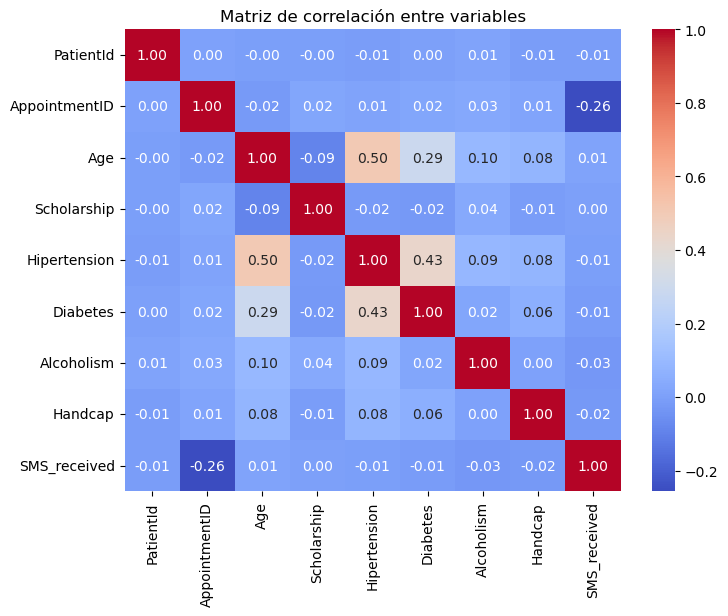

In [7]:
plt.figure(figsize=(8, 6))
variables_numericas = ['PatientId','AppointmentID','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

sns.heatmap(df[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Paso 4: Agregamos un título al gráfico
plt.title("Matriz de correlación entre variables")

# Paso 5: Mostramos el gráfico
plt.show()

In [8]:
# se analizan las columnas con null y no se encuentran
df_nulos=df.isnull()
display(df_nulos.sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64